## Analisis exploratorio de datos de NLP

In [1]:
import pandas as pd
import numpy as np

In [2]:
movie_df = pd.read_csv('movies_final_all.csv')
#dejamos caer las columnas que contienen los datos que no vamos a usar
movie_df.drop('Unnamed: 0', axis=1, inplace=True)
movie_df.drop('traduccion_idioma', axis=1, inplace=True)
movie_df

,titulo,link,traduccion
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,'Un oficial del ejército estadounidense que si...
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"'En la época victoriana, dos niños naufragan e..."
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,'La tripulación de una nave espacial comercial...
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,'Una familia se dirige a un hotel aislado para...
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,'Tras ser brutalmente dominados los rebeldes p...
...,...,...,...
247141,Scream of the Bikini,https://www.imdb.com/title/tt1358254/?ref_=adv...,'Una joven pareja de Nueva York crea una intri...
247142,Puck Hogs,https://www.imdb.com/title/tt1249307/?ref_=adv...,'Un joven novelista intenta escribir sobre el ...
247143,Caído de las nubes,https://www.imdb.com/title/tt1526741/?ref_=adv...,'Padre e hijo viajando de Victoria a Cape York...
247144,Los Tres Investigadores y el Secreto del Casti...,https://www.imdb.com/title/tt1156519/?ref_=adv...,'Al Lcpl Arne Christenson le quedan tres días ...


Analisis exploratorio de datos antes de limpieza (número de carácteres, número de palabras)

In [3]:
#dejamos caer las filas que contienen valores nulos
movie_df.dropna(subset = ["traduccion"], inplace=True)
#el número de carácteres
movie_df['trad_num_car'] = movie_df['traduccion'].str.len()
#el número de palabras
movie_df['trad_num_pal'] = movie_df['traduccion'].str.split().str.len()
#count.index = count.index.astype(str)
movie_df.sort_index(inplace=True)
movie_df

,titulo,link,traduccion,trad_num_car,trad_num_pal
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,'Un oficial del ejército estadounidense que si...,174,31
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"'En la época victoriana, dos niños naufragan e...",206,34
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,'La tripulación de una nave espacial comercial...,134,20
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,'Una familia se dirige a un hotel aislado para...,206,32
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,'Tras ser brutalmente dominados los rebeldes p...,228,35
...,...,...,...,...,...
247141,Scream of the Bikini,https://www.imdb.com/title/tt1358254/?ref_=adv...,'Una joven pareja de Nueva York crea una intri...,86,14
247142,Puck Hogs,https://www.imdb.com/title/tt1249307/?ref_=adv...,'Un joven novelista intenta escribir sobre el ...,160,28
247143,Caído de las nubes,https://www.imdb.com/title/tt1526741/?ref_=adv...,'Padre e hijo viajando de Victoria a Cape York...,130,24
247144,Los Tres Investigadores y el Secreto del Casti...,https://www.imdb.com/title/tt1156519/?ref_=adv...,'Al Lcpl Arne Christenson le quedan tres días ...,148,29


In [4]:
print("Número promedio de carácteres: " + str(movie_df['trad_num_car'].mean(axis = 0, skipna = True)))
print("Número promedio de palabras:   " + str(movie_df['trad_num_pal'].mean(axis = 0, skipna = True)))

Número promedio de carácteres: 227.3012753595041
Número promedio de palabras:   38.7719607033899


## Limpieza de texto
Para poder extraer las características vectoriales del corpus es conveniente realizar primero una limpieza y pre-procedado de cada descripción traducida.\
Realizaremos el siguiente procesado:
- Introducir un espacio después de determinados signos de puntuación (".", "?") para que el tokenizado sea correcto
- Separar el texto en *tokens*
- Eliminar los *tokens* de tipo *stop-word*, signos de puntuación o espacios o de longitud 1
- Lematizar el texto y pasarlo a minúsculas

In [5]:
import spacy
import os, re

nlp = spacy.load("es_core_news_sm")
#añadimos stop words
nlp.Defaults.stop_words |= {"él","película","historia"}

def normaliza(texto):
    #separamos después de ciertos signos de puntuación
    texto = re.sub(r"([\.\?])", r"\1 ", texto)
    doc = nlp(texto)
    # quitamos puntuación/espacios y stopwords
    tokens = [t for t in doc if not t.is_punct and not t.is_stop and not t.is_space and len(t.text)>1]
    palabras = []
    for t in tokens:
        palabras.append(t.lemma_.lower())
    # juntamos de nuevo en una cadena
    salida = ' '.join(palabras)
    
    return salida

In [6]:
%%time

#normalizamos la descripción
movie_df['traduccion_limpia'] = movie_df['traduccion'].apply(normaliza)
movie_df

Wall time: 41min 15s


,titulo,link,traduccion,trad_num_car,trad_num_pal,traduccion_limpia
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,'Un oficial del ejército estadounidense que si...,174,31,oficial ejército estadounidense servir vietnam...
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"'En la época victoriana, dos niños naufragan e...",206,34,época victorián niño naufragar isla tropical p...
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,'La tripulación de una nave espacial comercial...,134,20,tripulación nave espacial comercial forma vida...
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,'Una familia se dirige a un hotel aislado para...,206,32,familia dirigir hotel aislado pasar invierno p...
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,'Tras ser brutalmente dominados los rebeldes p...,228,35,brutalmente dominado rebelde imperio planeta h...
...,...,...,...,...,...,...
247141,Scream of the Bikini,https://www.imdb.com/title/tt1358254/?ref_=adv...,'Una joven pareja de Nueva York crea una intri...,86,14,joven pareja york creer intrincado estrategia ...
247142,Puck Hogs,https://www.imdb.com/title/tt1249307/?ref_=adv...,'Un joven novelista intenta escribir sobre el ...,160,28,joven novelista escribir amor necesitar experi...
247143,Caído de las nubes,https://www.imdb.com/title/tt1526741/?ref_=adv...,'Padre e hijo viajando de Victoria a Cape York...,130,24,padre hijo viajar victoria cape york cumplir a...
247144,Los Tres Investigadores y el Secreto del Casti...,https://www.imdb.com/title/tt1156519/?ref_=adv...,'Al Lcpl Arne Christenson le quedan tres días ...,148,29,lcpl arne christenson quedar tratar entender v...


In [7]:
# guardamos el archivo
movie_df.to_csv('movies_bus_lexica_prueba.csv', encoding='utf-8-sig')

In [153]:
#sample = movie_df[:15]
#sample

,titulo,link,traduccion,trad_num_car,trad_num_pal
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,'Un oficial del ejército estadounidense que si...,174,31
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"'En la época victoriana, dos niños naufragan e...",206,34
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,'La tripulación de una nave espacial comercial...,134,20
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,'Una familia se dirige a un hotel aislado para...,206,32
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,'Tras ser brutalmente dominados los rebeldes p...,228,35
5,Aterriza como puedas,https://www.imdb.com/title/tt0080339/?ref_=adv...,'Un hombre con miedo a volar debe asegurarse d...,121,21
6,Los pasajeros del tiempo,https://www.imdb.com/title/tt0080025/?ref_=adv...,'H. G. Wells persigue a Jack el Destripador ha...,166,30
7,Calígula,https://www.imdb.com/title/tt0080491/?ref_=adv...,"'Detalla la historia impactante, pero innegabl...",102,14
8,Holocausto caníbal,https://www.imdb.com/title/tt0078935/?ref_=adv...,'Durante una misión de rescate en la selva ama...,150,23
9,"10, la mujer perfecta",https://www.imdb.com/title/tt0078721/?ref_=adv...,'Un compositor de Hollywood atraviesa una cris...,114,20


In [154]:
#%%time

#normalizamos la descripción
#sample['traduccion_limpia'] = sample['traduccion'].apply(normaliza)
#sample

Wall time: 155 ms


,titulo,link,traduccion,trad_num_car,trad_num_pal,traduccion_limpia
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,'Un oficial del ejército estadounidense que si...,174,31,oficial ejército estadounidense servir vietnam...
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"'En la época victoriana, dos niños naufragan e...",206,34,época victorián niño naufragar isla tropical p...
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,'La tripulación de una nave espacial comercial...,134,20,tripulación nave espacial comercial forma vida...
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,'Una familia se dirige a un hotel aislado para...,206,32,familia dirigir hotel aislado pasar invierno p...
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,'Tras ser brutalmente dominados los rebeldes p...,228,35,brutalmente dominado rebelde imperio planeta h...
5,Aterriza como puedas,https://www.imdb.com/title/tt0080339/?ref_=adv...,'Un hombre con miedo a volar debe asegurarse d...,121,21,hombre miedo volar asegurar él avión aterrizar...
6,Los pasajeros del tiempo,https://www.imdb.com/title/tt0080025/?ref_=adv...,'H. G. Wells persigue a Jack el Destripador ha...,166,30,persona perseguir persona siglo xx asesino ser...
7,Calígula,https://www.imdb.com/title/tt0080491/?ref_=adv...,"'Detalla la historia impactante, pero innegabl...",102,14,detallar historia impactante innegablemente tr...
8,Holocausto caníbal,https://www.imdb.com/title/tt0078935/?ref_=adv...,'Durante una misión de rescate en la selva ama...,150,23,misión rescate selva amazónico profesor tropie...
9,"10, la mujer perfecta",https://www.imdb.com/title/tt0078721/?ref_=adv...,'Un compositor de Hollywood atraviesa una cris...,114,20,compositor hollywood atravesar crisis mediano ...


Analisis exploratorio de datos después de limpieza (número de carácteres, número de palabras)

In [8]:
#el número de carácteres
movie_df['trad_limpia_num_car'] = movie_df['traduccion_limpia'].str.len()
#el número de palabras
movie_df['trad_limpia_num_pal'] = movie_df['traduccion_limpia'].str.split().str.len()
#count.index = count.index.astype(str)
movie_df.sort_index(inplace=True)

movie_df

,titulo,link,traduccion,trad_num_car,trad_num_pal,traduccion_limpia,trad_limpia_num_car,trad_limpia_num_pal
0,Apocalypse Now,https://www.imdb.com/title/tt0078788/?ref_=adv...,'Un oficial del ejército estadounidense que si...,174,31,oficial ejército estadounidense servir vietnam...,113,14
1,El lago azul,https://www.imdb.com/title/tt0080453/?ref_=adv...,"'En la época victoriana, dos niños naufragan e...",206,34,época victorián niño naufragar isla tropical p...,123,17
2,"Alien, el octavo pasajero",https://www.imdb.com/title/tt0078748/?ref_=adv...,'La tripulación de una nave espacial comercial...,134,20,tripulación nave espacial comercial forma vida...,88,10
3,El resplandor,https://www.imdb.com/title/tt0081505/?ref_=adv...,'Una familia se dirige a un hotel aislado para...,206,32,familia dirigir hotel aislado pasar invierno p...,128,16
4,El Imperio contraataca,https://www.imdb.com/title/tt0080684/?ref_=adv...,'Tras ser brutalmente dominados los rebeldes p...,228,35,brutalmente dominado rebelde imperio planeta h...,158,20
...,...,...,...,...,...,...,...,...
247141,Scream of the Bikini,https://www.imdb.com/title/tt1358254/?ref_=adv...,'Una joven pareja de Nueva York crea una intri...,86,14,joven pareja york creer intrincado estrategia ...,53,7
247142,Puck Hogs,https://www.imdb.com/title/tt1249307/?ref_=adv...,'Un joven novelista intenta escribir sobre el ...,160,28,joven novelista escribir amor necesitar experi...,76,10
247143,Caído de las nubes,https://www.imdb.com/title/tt1526741/?ref_=adv...,'Padre e hijo viajando de Victoria a Cape York...,130,24,padre hijo viajar victoria cape york cumplir a...,89,13
247144,Los Tres Investigadores y el Secreto del Casti...,https://www.imdb.com/title/tt1156519/?ref_=adv...,'Al Lcpl Arne Christenson le quedan tres días ...,148,29,lcpl arne christenson quedar tratar entender v...,67,10


In [9]:
print("Número promedio de carácteres: " + str(movie_df['trad_limpia_num_car'].mean(axis = 0, skipna = True)))
print("Número promedio de palabras:   " + str(movie_df['trad_limpia_num_pal'].mean(axis = 0, skipna = True)))

Número promedio de carácteres: 138.13827454217346
Número promedio de palabras:   18.126314000631204


## Creamos trigramas

Creamos un modelo para las palabras más frecuentes como bigrama o trigrama para considerar estos tokens juntos en lugar de separados.

In [10]:
# convertimos la columna dataframe a diccionario de palabras
movie_df['traduccion_limpia'] = movie_df['traduccion_limpia'].str.split(" ")

In [11]:
import warnings

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
warnings.filterwarnings('ignore')

# spacy para lematizar
import spacy

# herramientas de dibujado
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#creamos bigramas y trigramas
bigram = gensim.models.Phrases(movie_df.traduccion_limpia, min_count=5, threshold=50) # higher threshold fewer phrases.
#optimizamos una vez entreando
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram_mod[movie_df.traduccion_limpia], min_count=5, threshold=50)  
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_trigrams(text):
    '''Devuelve un doc convertido en trigramas según el
    modelo trigram_mod. La entrada tiene que ser una lista
    de de tokens'''
    return trigram_mod[bigram_mod[text]]

Creamos un *streamer* de datos para generar el texto convertido en trigramas a partir de un corpus normalizado

In [13]:
class TrigramCorpus(object):
    """Pre-procesa un archivo de texto línea a línea
    Entrada: nombre del archivo de texto a procesar (string)
    Salida: iterador sobre cada línea normalizado (lista de tokens)"""
    def __init__(self, corpus):
        self.corpus = corpus
 
    def __iter__(self):
        for t in self.corpus:
            yield make_trigrams(t)

Crea el objeto `texto_trigramas` como un *streamer* de datos del objeto `movie_df.traduccion_limpia`

In [14]:
textos_trigramas = TrigramCorpus(movie_df.traduccion_limpia)

In [15]:
for t in textos_trigramas:
    print(t)
    break

['oficial_ejército', 'estadounidense', 'servir', 'vietnam', 'recibir_encargo', 'asesinar', 'coronel', 'renegado', 'fuerza', 'especial', 'ver', 'dios']


## Creamos el diccionario y el corpus para Topic Modeling
Las dos entradas para el modelo LDA son un diccionario de `gensim` y un corpus de texto.  
Creamos un streamer que genera el diccionario (atributo `diccionario`) y el corpus (como BoW):

In [16]:
#para no tener que cargar todo el corpus en memoria creamos un streamer
class BOW_Corpus(object):
    """
    Iterable: en cada iteración devuelve el vector bag-of-words
    del siguiente documento en el corpus.
    
    Procesa un documento cada vez usando un generator, así
    nunca carga el corpus entero en RAM.
    """
    def __init__(self, corpus):
        self.corpus = corpus
        #crea el diccionario = mapeo de documentos a sparse vectors
        self.diccionario = gensim.corpora.Dictionary(corpus)
 
    def __iter__(self):
        """
        __iter__ es un generator => TxtSubdirsCorpus es un streamed iterable.
        """
        for tokens in self.corpus:
            # transforma cada doc (lista de tokens) en un vector sparse uno a uno
            yield self.diccionario.doc2bow(tokens)

In [17]:
corpus_bow = BOW_Corpus(textos_trigramas)

In [18]:
len(corpus_bow.diccionario)

161730

## Selección del número de temas
Para seleccionar el número óptimo de temas, debemos hacer un barrido y seleccionar el modelo con mayor valor de coherencia (Topic coherence).  
Lo podemos automatizar en una función.

In [19]:
def evaluate_graph(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    start: min number of topics
    step: step between topics number swept
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    n_topics = list(range(start, limit, step))
    for num_topics in n_topics:
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = n_topics
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v, n_topics

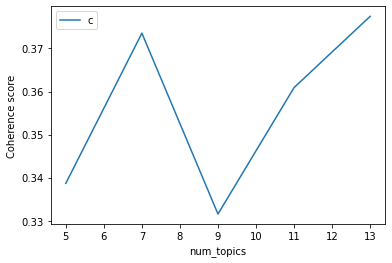

Wall time: 17min 22s


In [20]:
%%time

lmlist, c_v, n = evaluate_graph(dictionary=corpus_bow.diccionario,
                                corpus=corpus_bow,
                                texts=textos_trigramas,
                                limit=15,
                                start=5,
                                step=2)

## Modelo LDA
Es un modelo generativo que considera cada documento como una mezcla de temas donde cada tema tiene una distribución de las palabras.

In [21]:
from pprint import pprint

warnings.filterwarnings('ignore')


ldamodel = LdaModel(corpus=corpus_bow, num_topics=7, id2word=corpus_bow.diccionario)
pprint(ldamodel.print_topics())

[(0,
  '0.034*"él" + 0.023*"padre" + 0.016*"hijo" + 0.016*"joven" + 0.016*"familia" '
  '+ 0.015*"vivir" + 0.014*"vida" + 0.013*"hombre" + 0.013*"madre" + '
  '0.012*"mujer"'),
 (1,
  '0.007*"jack" + 0.007*"secundaria" + 0.004*"proyecto" + 0.004*"aislado" + '
  '0.004*"ben" + 0.003*"sobrenatural" + 0.003*"inquietante" + 0.003*"mike" + '
  '0.003*"lugar" + 0.003*"surrealista"'),
 (2,
  '0.013*"policía" + 0.010*"él" + 0.007*"robar" + 0.006*"ladrón" + '
  '0.006*"banda" + 0.005*"criminal" + 0.005*"local" + 0.005*"pandilla" + '
  '0.005*"dinero" + 0.005*"jefe"'),
 (3,
  '0.011*"the" + 0.007*"equipo" + 0.006*"terror" + 0.005*"tierra" + '
  '0.005*"documental" + 0.004*"estadounidense" + 0.004*"mundo" + '
  '0.004*"película" + 0.004*"secreto" + 0.004*"ruso"'),
 (4,
  '0.009*"grupo" + 0.009*"él" + 0.009*"encontrar" + 0.008*"hombre" + '
  '0.008*"niño" + 0.008*"pueblo" + 0.007*"joven" + 0.007*"descubrir" + '
  '0.007*"asesinato" + 0.007*"ciudad"'),
 (5,
  '0.028*"vida" + 0.013*"amor" + 0.008*"m

## Visualización de los temas  
Podemos visualizarlo gráficamente la distribución de los documentos del Corpus por temas con la librería `pyLDAvis`

In [22]:
corpus = list(corpus_bow) #necesitamos pasar el BoW a una lista en memoria para pyLDAvis
vis_data = gensimvis.prepare(ldamodel, corpus, corpus_bow.diccionario)
pyLDAvis.display(vis_data)

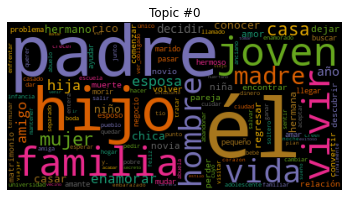

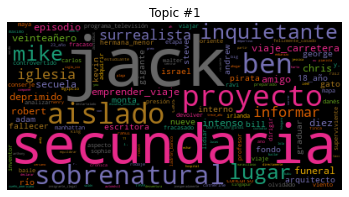

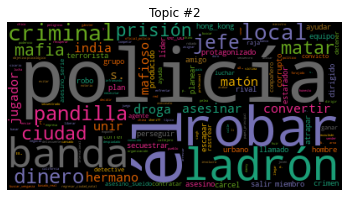

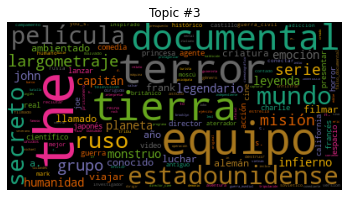

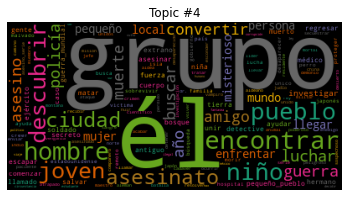

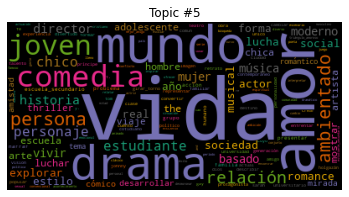

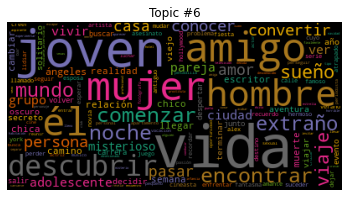

In [23]:
from wordcloud import WordCloud

for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud(max_words=150,colormap="Dark2").fit_words(dict(ldamodel.show_topic(t, 200))))
    #if we use "lda" instead if "lda_model", numbers (id of a token would appear)
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [24]:
nlp = spacy.load("es_core_news_sm")
print(len(nlp.Defaults.stop_words))
print(nlp.Defaults.stop_words)

553
{'trabajas', 'mi', 'fui', 'intentais', 'dan', 'informo', 'ese', 'tras', 'expresó', 'último', 'eso', 'cosas', 'casi', 'gueno', 'estará', 'hace', 'cinco', 'dejó', 'quienes', 'vaya', 'pais', 'propios', 'suya', 'habia', 'buenos', 'aquélla', 'hacerlo', 'cuál', 'día', 'nueva', 'bueno', 'cual', 'decir', 'usted', 'mencionó', 'afirmó', 'demás', 'estan', 'hecho', 'bastante', 'alli', 'empleais', 'bajo', 'son', 'tu', 'soy', 'dia', 'breve', 'da', 'ésas', 'ningunos', 'una', 'nuestras', 'estar', 'indicó', 'poner', 'sera', 'lado', 'quiénes', 'contra', 'cuales', 'hacer', 'dado', 'habrá', 'podemos', 'mas', 'adrede', 'donde', 'unos', 'hablan', 'deben', 'pesar', 'ésta', 'hacemos', 'otro', 'al', 'ambos', 'debe', 'hizo', 'porque', 'diferentes', 'cuántos', 'ahí', 'aquéllas', 'tiene', 'nuevo', 'cuánta', 'qeu', 'fueron', 'menudo', 'primero', 'buen', 'explicó', 'tenido', 'ningunas', 'cuenta', 'tuyas', 'entonces', 'encima', 'dicho', 'vosotros', 'soyos', 'total', 'intentas', 'ademas', 'podrá', 'aquello', 'dio

In [25]:
'él' in nlp.Defaults.stop_words

True

In [26]:
nlp("película")[0].is_stop

True

https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119